# Assignment 1- Network Science

#### Submitted By: Afshan Anam Saeed

## Part 1- Constructing Networks

Before beginning the coding part of the assignment, I am going to import three main Python libraries which will form the basis of our network construction and analysis. The three libraries are-
1. networkx for constructing the networks
2. numpy for mathematical calculations
3. matplotlib.pyplot for constructing visuals.

All three libraries have abbreviations listed (example 'nx' for networkx) to make code writing easier.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#### 1. Constructing a Star- Shaped Network

The basic step for constructing a network involves creating a graph object from networkx library and adding nodes using related commands. Later, I will visualize the network using the draw command.

The given task is to construct a Star Shaped Network that has 32 nodes. A star shaped node is one in which every node is connected to a central node, and is not connected with any other node. In my network, my nodes range from the number zero (0) to thirty one (31)- giving me a total of 32 nodes. Here, the connection between the nodes is defined to be an edge, and is unweighted and non-directed.

Here, every node has a degree of 1, except the central node (0), which has a degree of 31.

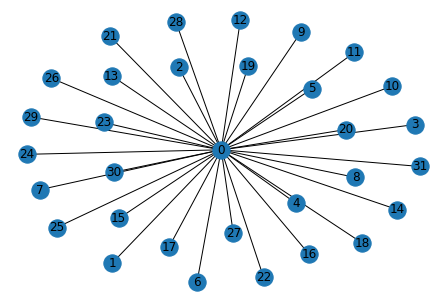

In [2]:
g1=nx.Graph()                     #creating an object using networkx

for i in range (32):              #iterating over different nodes
    g1.add_node(i)                #adding of the node to the network      
    g1.add_edge(0,i)              #connecting the new nodes to the central node (0) of the network- making edges.

nx.draw(g1,with_labels=True)      #visualizing the network

#### 2. Fully-connected Network

A fully connected node is one in which a node of the network is connected to every other node present in the network. The steps for implementing a fully connected network is the same as done earlier, except the number of edges need to be increased in this case. For the assignment, I am implementing a fully connected network which as 32 nodes, and is unweighted and undirected. 

Here, every node has a degree of 31.

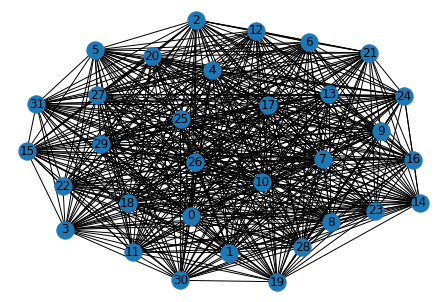

In [3]:
g2=nx.Graph()                            #creating the graph object using networkx

for i in range(32):                      #iterating over the nodes
    g2.add_node(i)                       #adding the node to the network
    for j in range(i):                   #iterating over the nodes already present within the network
        g2.add_edge(j,i)                 #adding edges of the new node with all other nodes in the network
        
nx.draw(g2,with_labels=True)             #visualizing the network

#### 3. One- dimensional Network

A one dimensional network is one in which every node is only connected to its neighboring nodes and is enclosed. Here, the node count is again 32, enclosed, undirected and unweighted, and the degree of each node is 2. 

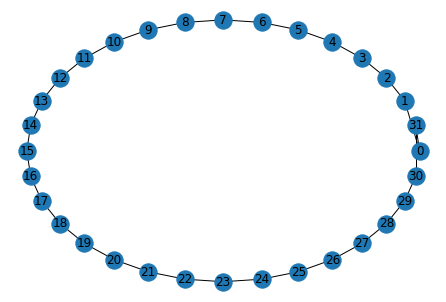

In [4]:
g3=nx.Graph()                              #make a graph object using networkx

for i in range(32):                        #iterating over all the nodes
    g3.add_node(i)                         #adding the node to the network
    if i!=0:                               #using if statement as 0 cannot connect to any node with a value below it.
        g3.add_edge(i-1,i)                 #adding the edges of the node to its immediate neighbor
    else:                                  #using the else statement for the '0' node
        g3.add_edge(31,0)                  #connecting the last node (31) to the first node (0) for enclosing the network
        
nx.draw_circular(g3,with_labels=True)      #visualizing the network

## Part 2- Data based network approach

In the next part of the assignment, I will be working on three different datasets-
1. Zachary Karate Club data set- It provides information on the various links within a karate club.
2. NetSci Data set- The network depicting the collaborations within scientists.
3. Facebook friendship links- A network between different facebook friends.

Before diving into the datasets, I will write down a function for obtaining the node identity with the maximum degree within a network. I will take the network as the input and produce a tuple containing the node id with the maximum degree and its corresponding degree. 

The logic behind this function is firstly to make lists of nodes and degrees by carefully noting down the indexes, and then calling the max function to find the maximum degree from the degrees list. Using this value, find the index and note down the node with the corresponding index from the nodes list. The final output is the node ID and its degree. 

In [5]:
def max_degree(name_of_network):
    degree_dv=name_of_network.degree()                          #obtaining a degree view dictionary of nodes with their degree
    nodes_list=[]                                                                                #defining a list of all nodes
    for i in name_of_network.nodes():                                                                #iterating over the nodes 
        nodes_list.append(i)                                                      #appending the list with corresponding nodes
    degree_list=[name_of_network.degree[i] for i in name_of_network.nodes()]                     #making a list of all degrees
    max_degree=max(degree_list)                                                #getting the maximum degree amongst all degrees
    max_node=nodes_list[degree_list.index(max_degree)]                               #getting the node with the maximum degree
    values=(max_node,max_degree)                                    #defining a tuple of the value of node with maximum degree
    return print("(Node ID, Degree)=",values)                                                             #printing the result

#### Dataset 1- Zachary Karate Club

In the follwing lines of code, I will import the .gml file for the data set containing the network of the Zachary Karate Club. I will then visualize it, obtain its adjacency matrix, calculate its average degree and Density, use the max_degree function to find out the node with maximum degree and plot a frequency distribution histogram of the degrees to understand the network.

In [6]:
zachary = nx.read_gml("C:\\Users\\Aqdus\\Downloads\\graph_karate.gml")         #importing the dataset

In [7]:
zachary                                                                        #calling the dataset

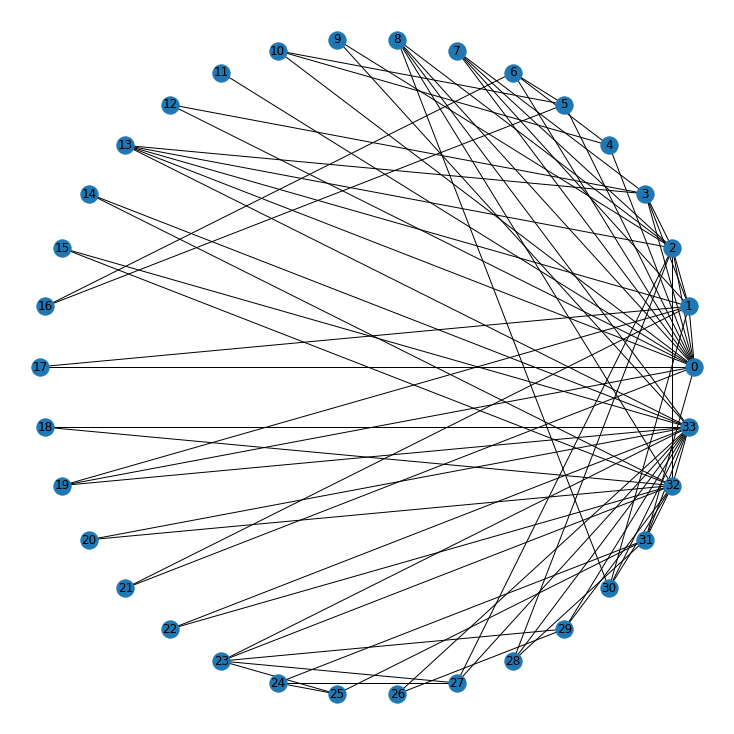

In [8]:
#visualizng the network
plt.figure(figsize=(10,10))                                                    #defining the size of the figure
nx.draw_circular(zachary,with_labels=True)                                     #calling the draw fnction to draw the network

From the above graph, it is seen that certain nodes have more links than the others. 

In [9]:
#obtaining the adjacency matrix 
a=nx.adjacency_matrix(zachary)                                                 #defining the adjacency matrix
print(a.todense())                                                             #printing the matrix

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


Computing the average degree and the density of the graph- 

The average density is mathematically defined as the the total number of edges divided by the total number of nodes. it is multiplied by 2 given that the networks are undirected.

The density of the network is mathematically defined as the ratio of the average degree with no. of nodes minus one. 

In [10]:
avdegree = 2 * zachary.number_of_edges()/zachary.number_of_nodes()                 #formula for average degree

density = (avdegree/(zachary.number_of_nodes() - 1))                              #formula for density

print("{} {}\n{} {}".format('The average degree of the network is:', avdegree, 'The density of the network is:', round(density, 2)))

The average degree of the network is: 4.588235294117647
The density of the network is: 0.14


Using the max_degree function to obtain the node with the maximum degree.

In [11]:
max_degree(zachary)

(Node ID, Degree)= (33, 17)


From the above result it is certain that the node no. 33 has the maximum connections within the Zachary Karate Club with a degree of 17.

Visualizing the degrees-
In the following lines of codes, I will create a list of the degrees present within the network for the respective nodes using matplotlib. I will then plot a frequency distribution histogram for these degrees by properly defining the bins, the axis and the graph. I have used the linear- linear plot for the case of Zachary Karate Club as that completely defines the distribution.

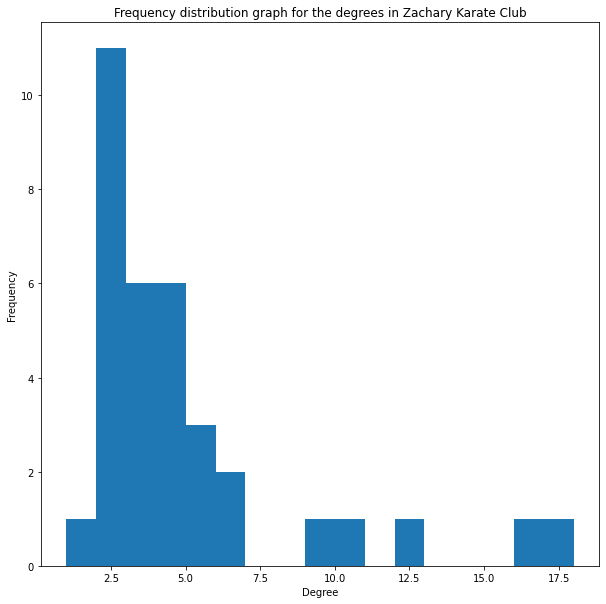

In [12]:
degree_zach=[zachary.degree[i] for i in zachary.nodes()]                             #creating a list of degrees
plt.figure(figsize=(10,10))                                                          #setting the figure size
plt.hist(degree_zach,bins=range(min(degree_zach),max(degree_zach)+2),label=True)     #visualizing the degree list using hist. Setting the bins
plt.xlabel("Degree")                                                                 #labelling the x axis
plt.ylabel("Frequency")                                                              #labelling the y axis
plt.title("Frequency distribution graph for the degrees in Zachary Karate Club")     #placing a title for the graph
plt.show()                                                                           #command for display of graph

From the graph above, we see that most common degree of the nodes is 2. Most of the nodes have the degrees below 7 while a few have degrees of 10 and above. 

#### Dataset 2- Netsci Collaborations

In this dataset of the collaboartions within the scientific community, the same principles of understanding the network are going to be used. 

In [13]:
netsci = nx.read_gml("C:\\Users\\Aqdus\\Downloads\\graph_netsci.gml")         #importing the network using networkx

In [14]:
netsci                                                                        #calling the network

Visualizing the network

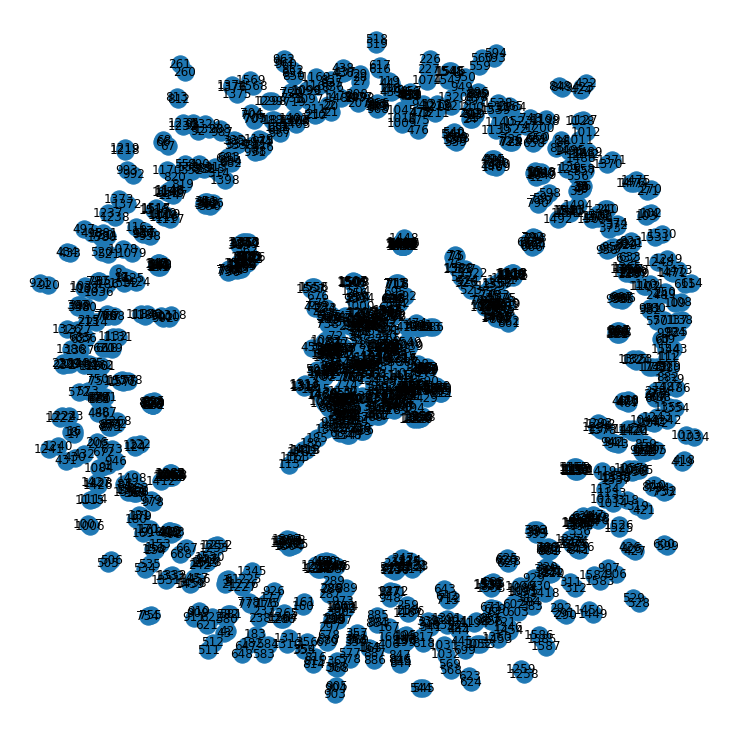

In [15]:
plt.figure(figsize=(10,10))                                          #setting the figure size                                   
nx.draw(netsci,with_labels=True)                                     #visulaizing the network using networkx

From the above network, a conclusion can be drawn that some scientists there are clusters of scientists that collaborate within themselves, and a cluster is often not very well collaborative with the other one. However, one certain chain also shows a deeper collaborative network.

Getting the adjacency matrix of this network.

In [16]:
b=nx.adjacency_matrix(netsci)                            #defining the adjacency matrix
print(b.todense())                                       #printing the matrix using dense function

[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


Calculating the average degree and density of the Scientific collaboartion Network-

In [17]:
avdegree = 2 * netsci.number_of_edges()/netsci.number_of_nodes()                      #formula for average degree

density = (avdegree/(netsci.number_of_nodes() - 1))                                   #formula for density of network

print("{} {}\n{} {}".format('The Average degree of NetSci Network is:', avdegree, 'Its Density is:', round(density, 2)))

The Average degree of NetSci Network is: 3.753593429158111
Its Density is: 0.0


Using the max_degree function to calculate the node with the maximum degree-

In [18]:
max_degree(netsci)

(Node ID, Degree)= ('33', 34)


From above it is seen that scientist number 33, with a degree of 34 has the maximum collaboarions within the network.

Viualizing the degrees using the frequency distribution curve-

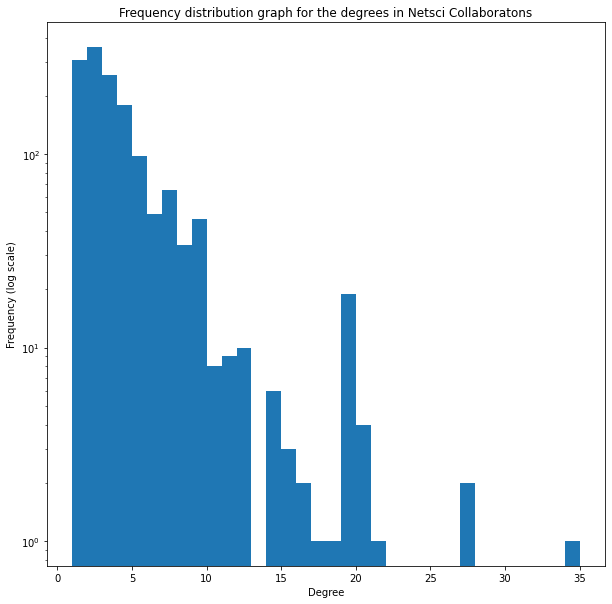

In [19]:
degree_netsci=[netsci.degree[i] for i in netsci.nodes()]                                  #making a degree list
plt.figure(figsize=(10,10))                                                               #defining the figure size
plt.hist(degree_netsci,bins=range(min(degree_netsci),max(degree_netsci)+2),label=True)    #plotiing the histogram with defined bins
plt.xlabel("Degree")                                                                      #labelling the x axis
plt.ylabel("Frequency (log scale)")                                                       #labelling the y axis
plt.title("Frequency distribution graph for the degrees in Netsci Collaboratons")         #title of the graph
plt.yscale('log')                                                                         #setting the scale of the y axis
plt.show()                                                                                #displaying the graph

In this graph, the frequency has been kept at a log scale as the linear scale could not well differentiate the frequencies. It is noticed that the maximum number of collaborations that take place between scientists is often less than 5 if we speak of maximum numbers. Otherwise, most scientists do have below 13 collaborations. Very rarely do a few scientists show more than 25 collaborations.

#### Dataset 3- Facebook Friendships

This dataset corresponds to a network of facebook friendships. Similar analysis of this network as the previous networks will be conducted corresponding to this network.

In [20]:
fb = nx.read_gml("C:\\Users\\Aqdus\\Downloads\\graph_facebook.gml")                       #importing the network
fb                                                                                        #calling the network

Visualizing the network-

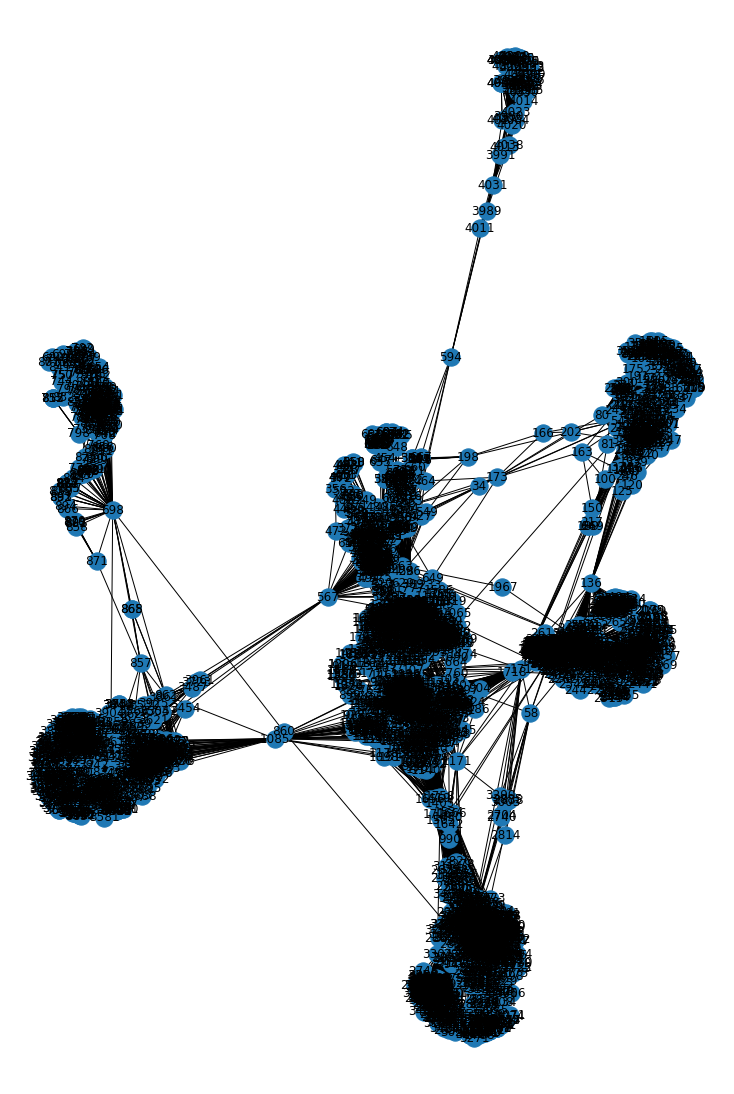

In [21]:
plt.figure(figsize=(10,15))                               #setting the plot size
nx.draw(fb,with_labels=True)                              #drawing the graph using networkx

From the figure above, we again see a cluster of networks. However, these clusters are often connected through one mutual friend or another.

Finding the average degree and density of the facebook friendship network.

In [22]:
avdegree = 2 * fb.number_of_edges()/fb.number_of_nodes()                           #formula for average degree

density = (avdegree/(fb.number_of_nodes() - 1))                                    #formula for density

print("{} {}\n{} {}".format('The average degree of the facebook friendship is:', avdegree, 'The density of the network is:', round(density, 2)))

The average degree of the facebook friendship is: 43.69101262688784
The density of the network is: 0.01


Displaying the Adjacency matrix of the network-

In [23]:
c=nx.adjacency_matrix(netsci)                                                     #defining the matrix
print(c.todense())                                                                #printing the matrix

[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


Using the maximum degree function to find the node having the maximum  number of friends-

In [24]:
max_degree(fb)

(Node ID, Degree)= ('107', 1045)


Here we see that node '107' has the maximum number of friends, with a total number of 1045 friends.

Visualizing the frequency distribution histogram for the given network-

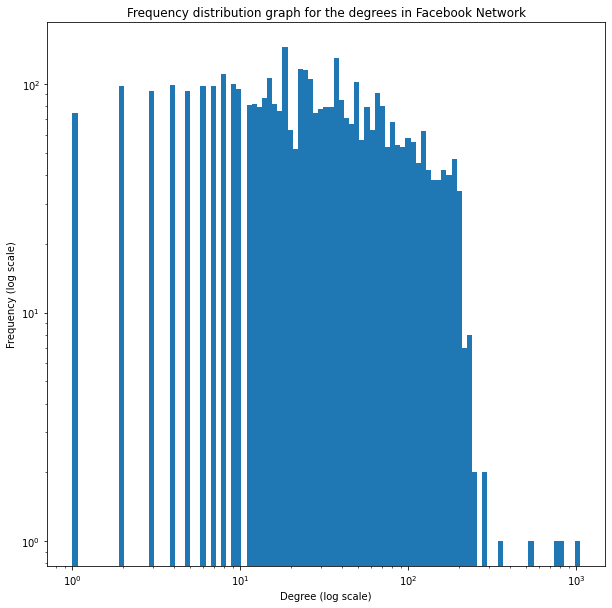

In [25]:
degree_fb=[fb.degree[i] for i in fb.nodes()]                                     #defining and creating a list of degrees
plt.figure(figsize=(10,10))                                                      #setting the figure size
plt.hist(degree_fb,
         bins=np.logspace(np.log10(min(degree_fb)),np.log10(max(degree_fb)),100),
         label=True)                                                             #plotting the frequency histogram with defined log bins
plt.xlabel("Degree (log scale)")                                                 #labelling the x axis
plt.ylabel("Frequency (log scale)")                                                          #labelling the y axis
plt.title("Frequency distribution graph for the degrees in Facebook Network")    #setting the title of the graph
plt.xscale('log')                                                                #setting the scale of the x axis
plt.yscale('log')                                                                #setting the scale of the y axis
plt.show()                                                                       #displaying the graph

This is a log-log type of graph. Binning has been done on a logarithmic scale. Here, it is noticed that all the degree count is less than 1000 (mostly). The frequencies seem constant for nodes with degrees upto 10, after which changes are seen. The bulk of nodes are mostly seen in the range above 10 and below 200 friends. Few people have a network of 200-300 friends. Very few people have an elaborate network of above 300 friends.